In [2]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import glob
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from numpy.linalg import eig #eigenvector decomposition

#plot
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap  # to define our own palette for plots
from matplotlib import pyplot #barplot

C:\Users\camil\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\camil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\camil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

In [5]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
id_run = config.id_run
pal_tr = config.pal_treat
path_extracted_data

change the configuration file if not done yet!


'G:\\VPHI\\Welfare\\2- Research Projects\\OFHE2.OriginsE2\\DataOutput\\TrackingSystem\\ALLDATA_'

In [ ]:
TODO: add model predictions!

# Download data

In [19]:
df = pd.read_csv(os.path.join(path_extracted_data, 'OFH_df_MVT_ALLVARALLWeekday.csv'), sep=',', index_col=0)
print(df.shape) 
display(df.head(3))

(30705, 34)


,PenID,level,Treatment,CLASS,DOA,WOA,DIB,WIB,weight_interp,KBF_interp,...,WentinWG.1,perc_duration_1_Zone,perc_duration_2_Zone,perc_duration_3_Zone,perc_duration_4_Zone,perc_duration_5_Zone,duration_1_Zone_h,date,temperature_C,temperature_C_avg
HenID,,,,,,,,,,,,,,,,,,,,,
hen_131,pen10,2020-11-24,TRAN,REXP,174,25,56,8,1734.616667,0.0,...,1,1.0,47.0,37.0,4.0,11.0,0.115556,2020-11-24,"[1, 1, 2, 2, 2, 2]",1.666667
hen_131,pen10,2020-11-25,TRAN,REXP,175,25,57,9,1737.233333,0.0,...,1,1.0,46.0,29.0,6.0,18.0,0.181667,2020-11-25,"[0, 1, 2, 2, 2, 2]",1.500000
hen_131,pen10,2020-11-26,TRAN,REXP,176,26,58,9,1739.850000,0.0,...,1,1.0,52.0,38.0,3.0,7.0,0.077778,2020-11-26,"[1, 3, 4, 4, 4, 3]",3.166667


In [21]:
df.columns

Index(['PenID', 'level', 'Treatment', 'CLASS', 'DOA', 'WOA', 'DIB', 'WIB',
       'weight_interp', 'KBF_interp', 'weekday', 'is_vacc',
       'vertical_travel_distance_perinsideh', 'food_sameDurTiming_r50_final',
       'mid_cum_Z4_h_Morning', 'mid_durationafterlightturnedon_Z4_h_Morning',
       'Intervaltime_midcumZ4hmorning_h', 'latency_1_Zone_h', 'WentinWG',
       'Sleeping_Uppest', 'Has_been_toptier_wholeday', 'duration_1_Zone_min',
       'perc_1_Zone_while_WG_open', 'nbr_h_WGopen', 'WentinWG.1',
       'perc_duration_1_Zone', 'perc_duration_2_Zone', 'perc_duration_3_Zone',
       'perc_duration_4_Zone', 'perc_duration_5_Zone', 'duration_1_Zone_h',
       'date', 'temperature_C', 'temperature_C_avg'],
      dtype='object')

# mvt over time

vertical_travel_distance_perinsideh


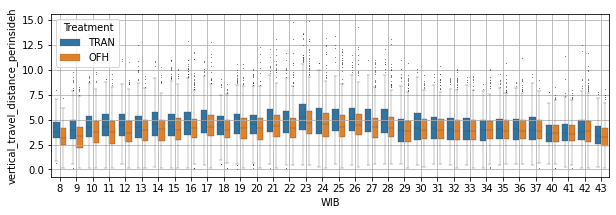

perc_duration_2_Zone


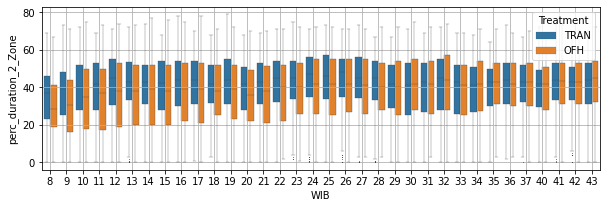

perc_duration_3_Zone


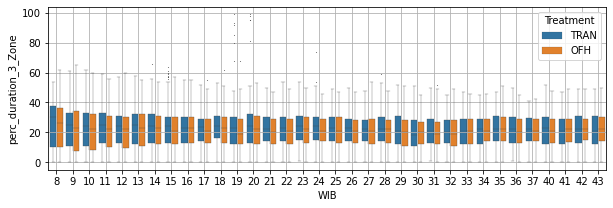

perc_duration_4_Zone


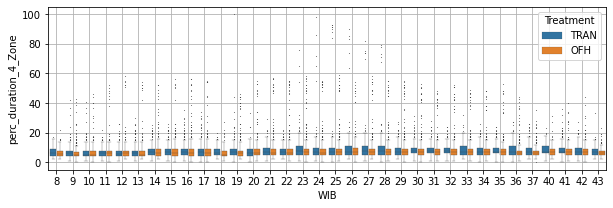

perc_duration_5_Zone


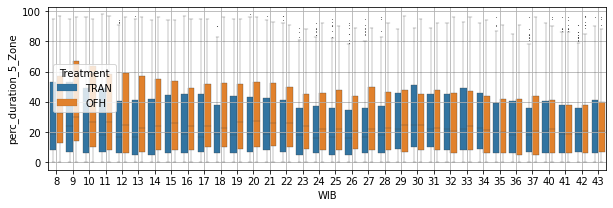

In [23]:
li_mvt_cont = ['vertical_travel_distance_perinsideh','perc_duration_2_Zone','perc_duration_3_Zone',
               'perc_duration_4_Zone','perc_duration_5_Zone']
for mvt in li_mvt_cont:
    print(mvt)
    plt.figure(figsize=(10,3))
    sns.boxplot(x='WIB', y=mvt, hue='Treatment', data=df, fliersize=0.2, linewidth=0.3);
    plt.grid(True)
    #plt.savefig(os.path.join(path_extracted_data,'OFH_'+mvt+'.png'), bbox_inches='tight')
    plt.show();

In [14]:
len(df['WIB'].unique())

30